<a href="https://colab.research.google.com/github/bodamohannaik/DLAI-TF-DPC/blob/master/C2/W2/cats_and_dogs_lab1_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import zipfile

# Download Dataset

In [ ]:
!curl -O https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0  51.5M      0  0:00:01  0:00:01 --:--:-- 51.5M
'cat-g1eddff5da_640 (1).jpg'   cats_and_dogs_filtered.zip   sample_data
 cat-g1eddff5da_640.jpg        data


In [ ]:
with zipfile.ZipFile('cats_and_dogs_filtered.zip', 'r') as zipfp:
  zipfp.extractall(path = "./data")
!ls ./data/cats_and_dogs_filtered

train  validation  vectorize.py


In [ ]:
# train directory
train_dir = "./data/cats_and_dogs_filtered/train"
!ls ./data/cats_and_dogs_filtered/train

cats  dogs


In [ ]:
validation_dir = "./data/cats_and_dogs_filtered/validation"
!ls ./data/cats_and_dogs_filtered/validation

cats  dogs


# Visualize Images

In [ ]:
def random_pet_image(pet_directory, number_of_images=4, target_size=None):
  """
  yield random number_of_images pet image array representation 
  """
  # all files in the pet directory
  files = os.listdir(pet_directory)
  # select random image files
  selected = np.random.choice(files, size=number_of_images, replace=False)
  # yield each image array representation
  for file in selected:
    # full path to the image
    file_path = os.path.join(pet_directory, file)
    # load image
    img = tf.keras.preprocessing.image.load_img(file_path, color_mode='rgb', target_size = target_size)
    # convert to numpy array
    img_array = tf.keras.preprocessing.image.img_to_array(img,dtype=np.uint8)
    print(f"File : {file_path}, shape: {img_array.shape} ")
    yield img_array

In [ ]:
def plot_random_pet_images(dir, number_of_images=4, pets= ['cats', 'dogs']):
  """
  Plot random pet images
  """
  fig, axs = plt.subplots(nrows=len(pets), ncols=number_of_images, figsize=(6*number_of_images, 6*len(pets)))
  for pet_idx in range(len(pets)) :
    for img_idx, img_array in enumerate(random_pet_image(pet_directory=os.path.join(dir, pets[pet_idx]), number_of_images=number_of_images)):
      ax = axs[pet_idx, img_idx]
      ax.imshow(img_array)


File : ./data/cats_and_dogs_filtered/train/cats/cat.554.jpg, shape: (500, 428, 3) 
File : ./data/cats_and_dogs_filtered/train/cats/cat.448.jpg, shape: (427, 402, 3) 
File : ./data/cats_and_dogs_filtered/train/cats/cat.287.jpg, shape: (151, 273, 3) 
File : ./data/cats_and_dogs_filtered/train/cats/cat.922.jpg, shape: (421, 499, 3) 
File : ./data/cats_and_dogs_filtered/train/cats/cat.48.jpg, shape: (93, 139, 3) 
File : ./data/cats_and_dogs_filtered/train/dogs/dog.778.jpg, shape: (500, 254, 3) 
File : ./data/cats_and_dogs_filtered/train/dogs/dog.212.jpg, shape: (499, 375, 3) 
File : ./data/cats_and_dogs_filtered/train/dogs/dog.292.jpg, shape: (450, 299, 3) 
File : ./data/cats_and_dogs_filtered/train/dogs/dog.80.jpg, shape: (368, 457, 3) 
File : ./data/cats_and_dogs_filtered/train/dogs/dog.883.jpg, shape: (337, 279, 3) 


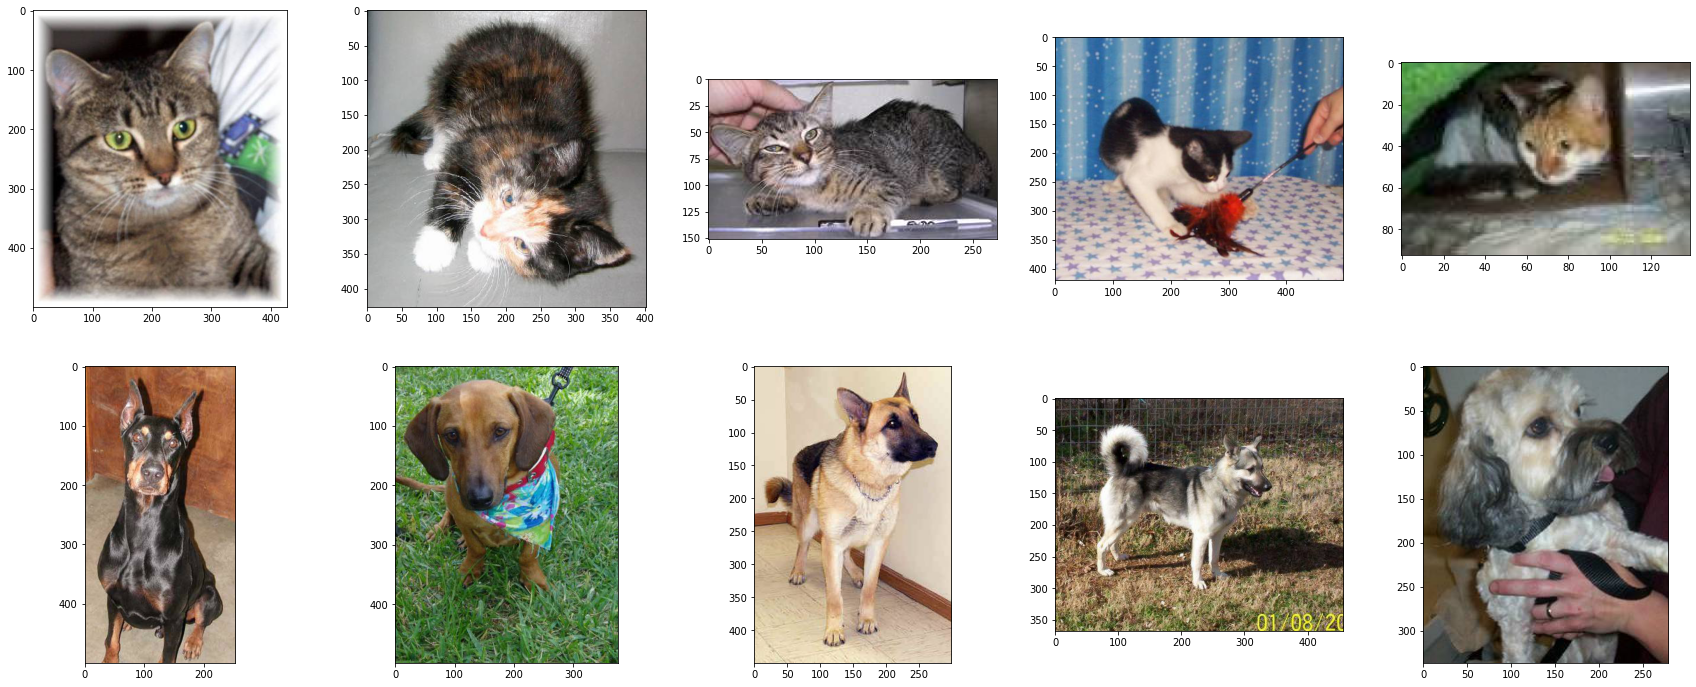

In [ ]:
plot_random_pet_images(dir=train_dir, number_of_images=5, pets= ['cats', 'dogs'])

File : ./data/cats_and_dogs_filtered/validation/cats/cat.2366.jpg, shape: (374, 500, 3) 
File : ./data/cats_and_dogs_filtered/validation/cats/cat.2245.jpg, shape: (374, 500, 3) 
File : ./data/cats_and_dogs_filtered/validation/cats/cat.2213.jpg, shape: (135, 179, 3) 
File : ./data/cats_and_dogs_filtered/validation/cats/cat.2067.jpg, shape: (354, 249, 3) 
File : ./data/cats_and_dogs_filtered/validation/cats/cat.2136.jpg, shape: (499, 339, 3) 
File : ./data/cats_and_dogs_filtered/validation/dogs/dog.2106.jpg, shape: (415, 500, 3) 
File : ./data/cats_and_dogs_filtered/validation/dogs/dog.2303.jpg, shape: (299, 400, 3) 
File : ./data/cats_and_dogs_filtered/validation/dogs/dog.2367.jpg, shape: (370, 500, 3) 
File : ./data/cats_and_dogs_filtered/validation/dogs/dog.2119.jpg, shape: (199, 178, 3) 
File : ./data/cats_and_dogs_filtered/validation/dogs/dog.2216.jpg, shape: (374, 500, 3) 


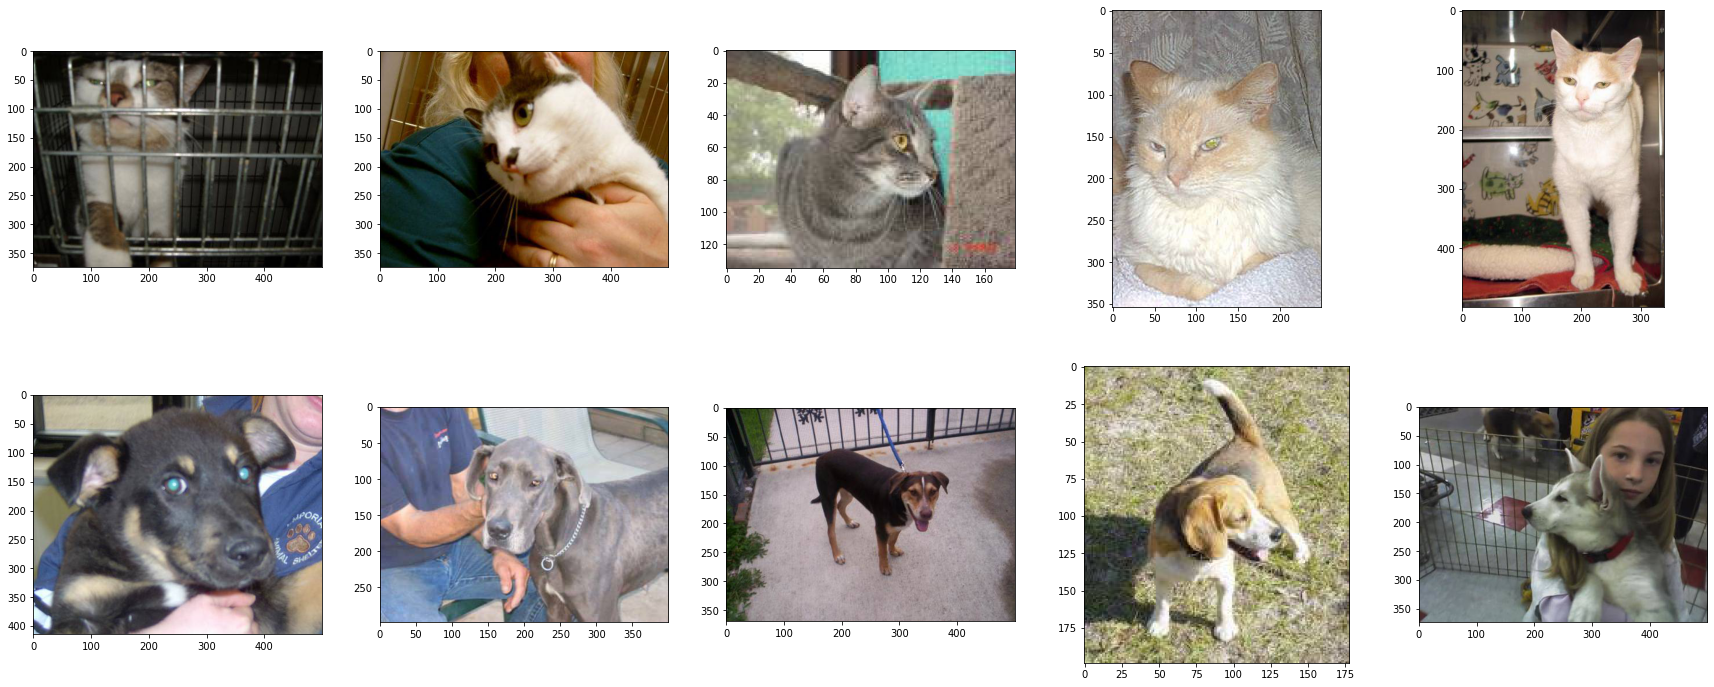

In [ ]:
plot_random_pet_images(dir=validation_dir, number_of_images=5, pets= ['cats', 'dogs'])

# Data Preparation

In [ ]:
target_size = (150, 150)
batch_size = 32

In [ ]:
train_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=45, width_shift_range=.2, height_shift_range=.2,
                                                                shear_range=.2, zoom_range=.2, horizontal_flip=True, vertical_flip=True)
train_gen = train_img_gen.flow_from_directory(directory=train_dir, target_size=target_size,
                                              color_mode='rgb', class_mode='binary', batch_size=batch_size)
train_gen

Found 2000 images belonging to 2 classes.


In [ ]:
validation_img_gen = tf.keras.preprocessing.image.ImageDataGenerator()
validation_gen = validation_img_gen.flow_from_directory(directory=validation_dir, target_size=target_size,
                                              color_mode='rgb', class_mode='binary', batch_size=batch_size)
validation_gen

Found 1000 images belonging to 2 classes.


# Neural Network

In [ ]:
model = tf.keras.Sequential( layers = [
    tf.keras.layers.Input(shape = target_size+(3, )),
    # Scaling
    tf.keras.layers.Rescaling(scale=1/255),
    # Convolution
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Convolution
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Convolution
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Flatten
    tf.keras.layers.Flatten(),
    # Dense
    tf.keras.layers.Dense(units=512, activation='relu'),
    # output
    tf.keras.layers.Dense(units=1, activation='sigmoid')]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1

# Train the Model

In [ ]:
# epochs
epochs = 100

In [ ]:
# compile
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()])
# fit
history = model.fit(train_gen, epochs=epochs, validation_data=validation_gen )

Epoch 1/100
63/63 [==============================] - 21s 261ms/step - loss: 0.7626 - binary_accuracy: 0.5225 - val_loss: 0.6883 - val_binary_accuracy: 0.5540
Epoch 2/100
63/63 [==============================] - 16s 256ms/step - loss: 0.6897 - binary_accuracy: 0.5265 - val_loss: 0.6925 - val_binary_accuracy: 0.5020
Epoch 3/100
63/63 [==============================] - 16s 254ms/step - loss: 0.6869 - binary_accuracy: 0.5425 - val_loss: 0.6593 - val_binary_accuracy: 0.6150
Epoch 4/100
63/63 [==============================] - 16s 255ms/step - loss: 0.6693 - binary_accuracy: 0.5895 - val_loss: 0.6860 - val_binary_accuracy: 0.5490
Epoch 5/100
63/63 [==============================] - 16s 261ms/step - loss: 0.6817 - binary_accuracy: 0.5560 - val_loss: 0.6633 - val_binary_accuracy: 0.6240
Epoch 6/100
63/63 [==============================] - 16s 258ms/step - loss: 0.6662 - binary_accuracy: 0.6065 - val_loss: 0.6256 - val_binary_accuracy: 0.6250
Epoch 7/100
63/63 [==============================] -

# Predict for new images

In [ ]:
indices_class = {v:k for k,v in train_gen.class_indices.items()}
indices_class

{0: 'cats', 1: 'dogs'}

In [ ]:
from google.colab import files
uploaded_files = files.upload()
for uploaded_file in uploaded_files:
  img = tf.keras.preprocessing.image.load_img(uploaded_file, color_mode='rgb', target_size = target_size)
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  y = model.predict(x)[0]
  label = 0
  if y > 0.5:
    label = 1
  print(f"file: {uploaded_file} belongs to {indices_class[label]}")


Saving cat-g084e3b60f_640.jpg to cat-g084e3b60f_640.jpg
file: cat-g084e3b60f_640.jpg belongs to cats


# Visualizing Intermediate Representations

File : ./data/cats_and_dogs_filtered/train/dogs/dog.23.jpg, shape: (150, 150, 3) 
input shape : (1, 150, 150, 3)
['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2']
Layer Name: conv2d , output shape : (1, 148, 148, 16)
Layer Name: max_pooling2d , output shape : (1, 74, 74, 16)
Layer Name: conv2d_1 , output shape : (1, 72, 72, 32)
Layer Name: max_pooling2d_1 , output shape : (1, 36, 36, 32)
Layer Name: conv2d_2 , output shape : (1, 34, 34, 64)
Layer Name: max_pooling2d_2 , output shape : (1, 17, 17, 64)


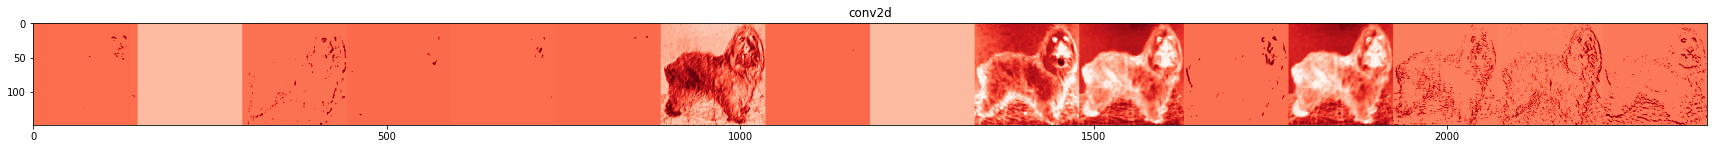

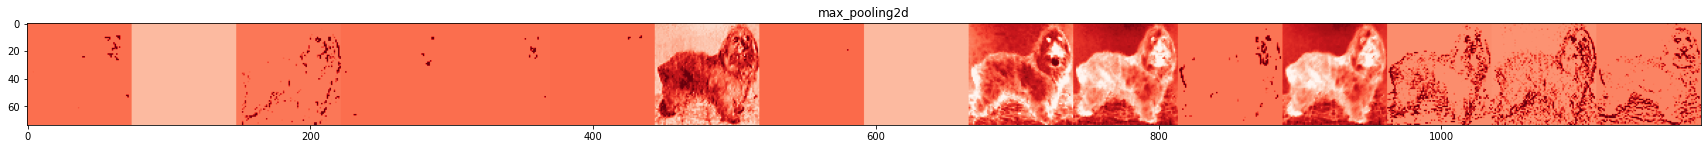

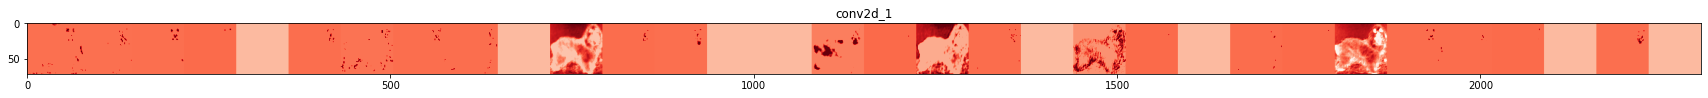

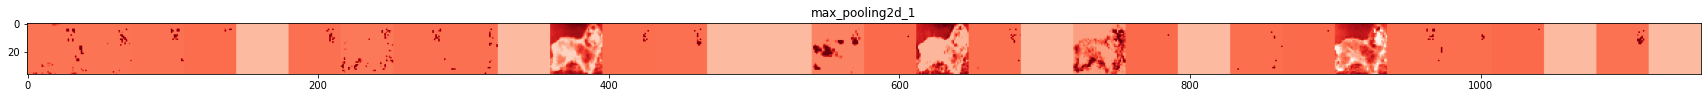

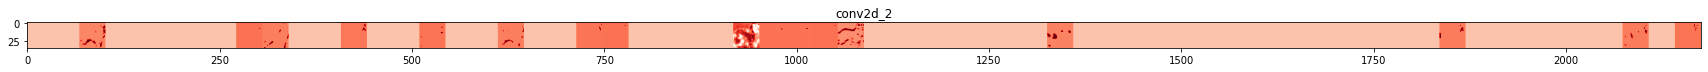

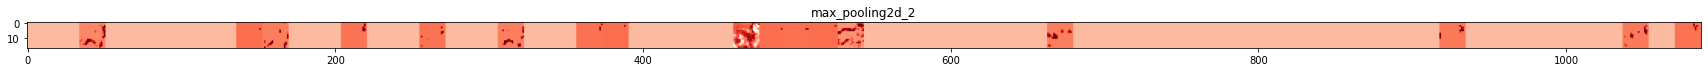

In [ ]:
pet = 'dogs' # cats/dogs
rpi =random_pet_image(pet_directory=os.path.join(train_dir, pet), number_of_images=1, target_size = target_size)
x = next(rpi)
# add batch dimension
x = np.expand_dims(x, axis=0)
print(f"input shape : {x.shape}")
# model
inputs = model.input
outputs = [layer.output for layer in  model.layers][1:7]
layer_names = [layer.name for layer in model.layers][1:7]
print(layer_names)
int_model = tf.keras.Model(inputs=inputs, outputs=outputs)
# int_model.summary()
x_outputs = int_model.predict(x)
for layer_name, layer_output in zip(layer_names, x_outputs):
  print(f"Layer Name: {layer_name} , output shape : {layer_output.shape}")
  n_features = layer_output.shape[-1]
  size = layer_output.shape[1]
  display_grid = np.zeros((size, size*n_features))
  for i in range(n_features):
    f = np.array(layer_output[0, :, :, i])
    f -= (f.mean()+0.000000001)
    f /= (f.std()++0.000000001)
    f *= 64
    f += 128
    f = np.clip(a = f, a_min=0, a_max=255).astype(np.uint8)
    display_grid[:, i*size:(i+1)*size] = f
  fig, axs = plt.subplots(figsize=(30, 30/n_features))
  axs.grid(False)
  axs.imshow(display_grid, cmap='Reds', aspect='auto')
  axs.set_title(layer_name)

# Plot Model accuracy and Loss

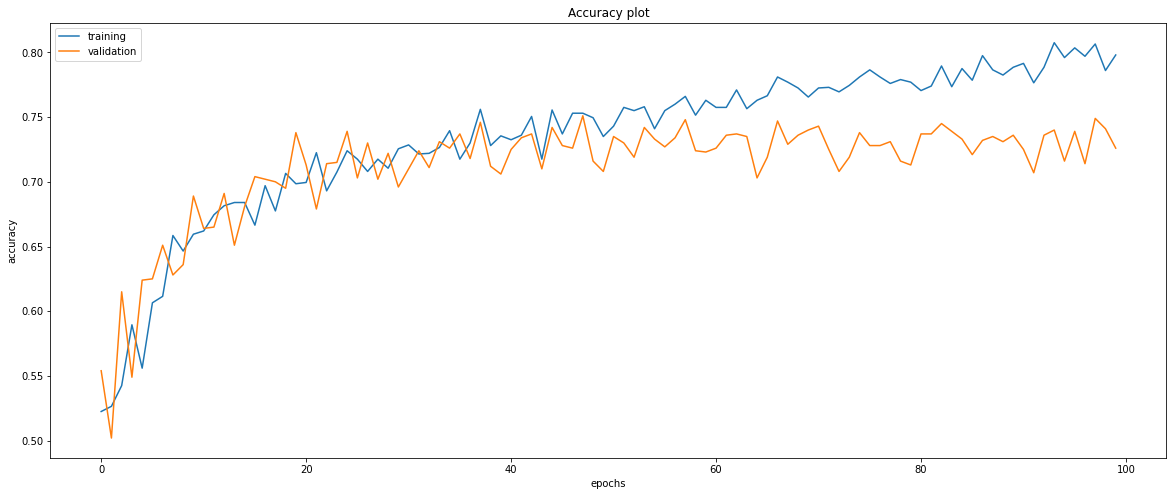

In [ ]:
# Accuracy
fig, axs = plt.subplots(figsize=(20,8))
axs.plot(history.history['binary_accuracy'], label='training')
axs.plot(history.history['val_binary_accuracy'], label='validation')
axs.set_xlabel('epochs')
axs.set_ylabel('accuracy')
axs.set_title('Accuracy plot')
axs.legend()

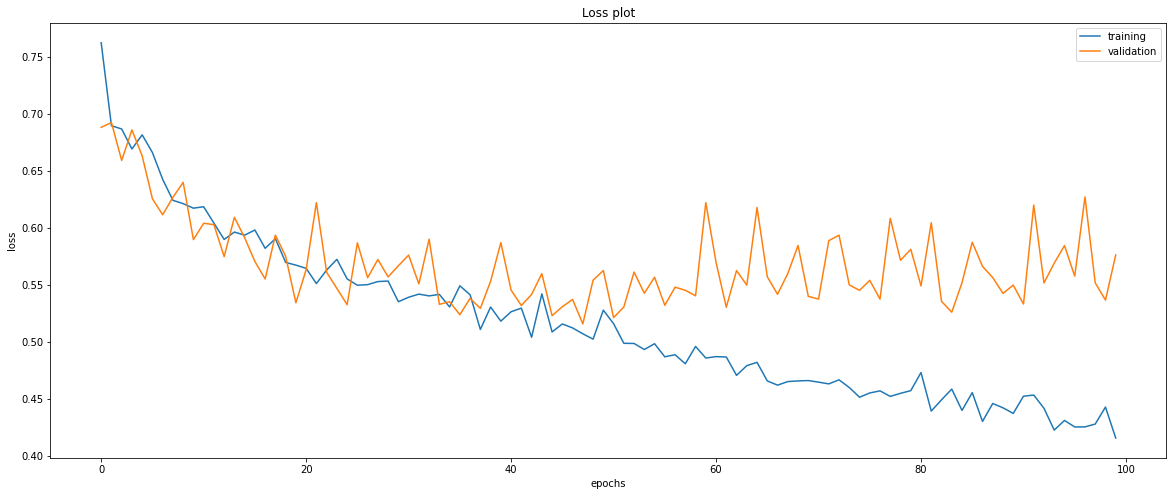

In [ ]:
# Loss
fig, axs = plt.subplots(figsize=(20,8))
axs.plot(history.history['loss'], label='training')
axs.plot(history.history['val_loss'], label='validation')
axs.set_xlabel('epochs')
axs.set_ylabel('loss')
axs.set_title('Loss plot')
axs.legend()